
# Exploratory Data Analysis of the Ames Housing Data

---

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Examine the data. What are the datatypes and what does a sample of the dataframe look like? Are there any NaNs?

In [2]:
# Load the data
house = pd.read_csv('../housing.csv')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
house.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
218,219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
541,542,60,RL,NaN,11000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,248000
200,201,20,RM,80.0,8546,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,140000


## Visualizations

Create some plots to visualize the data. In this dataset, the feature 'SalePrice' is the target. Let's look at the distribution of the home sales price and see how other features relate to it.

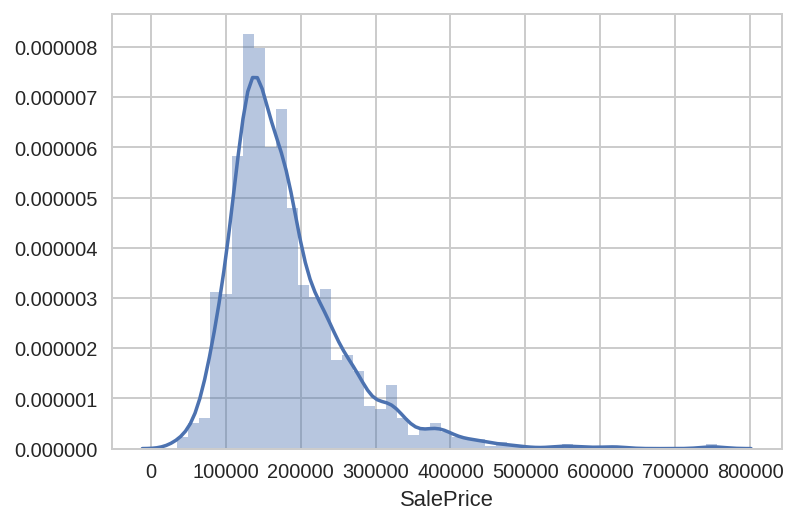

In [4]:
_ = sns.distplot(house['SalePrice'],axlabel='SalePrice')

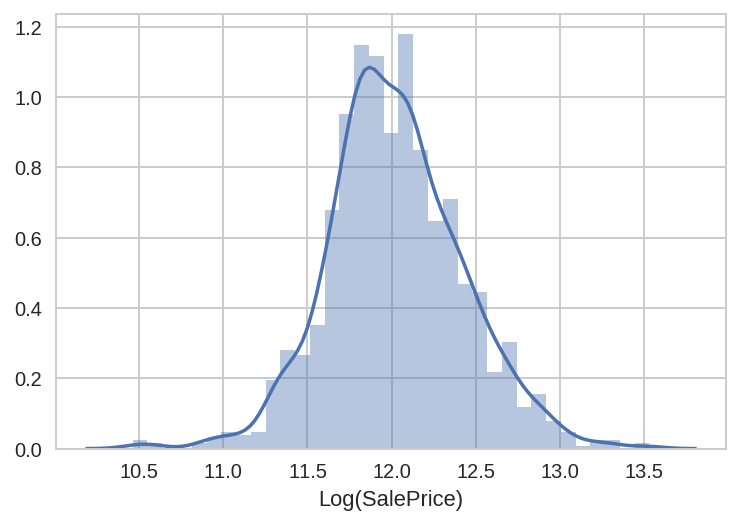

In [5]:
_ = sns.distplot(np.log(house['SalePrice']+1),axlabel='Log(SalePrice)')

We will look at a few plots to see how the various features correlate with the home's Sales Price.

I've defined a function to make composite boxplots for a given feature

In [6]:
def boxplotter(feature_name, data=house):
    sns.set(style='ticks')
    f,ax = plt.subplots(figsize=(7,6))
    # De-skew the SalePrice data for plotting
    ax.set_xscale('log')
    
    # Plot the data with horizontal boxplots
    _ = sns.boxplot(x='SalePrice', y=feature_name, data=data, whis=np.inf)
    
    # Add in points to show each observation
    _ = sns.swarmplot(x='SalePrice', y=feature_name, data=data, size=2, color='.3', linewidth=0)
    
    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    ax.set(xlabel="Log(SalePrice)")
    sns.despine(trim=True, left=True)

{nan, 'RFn', 'Unf', 'Fin'}


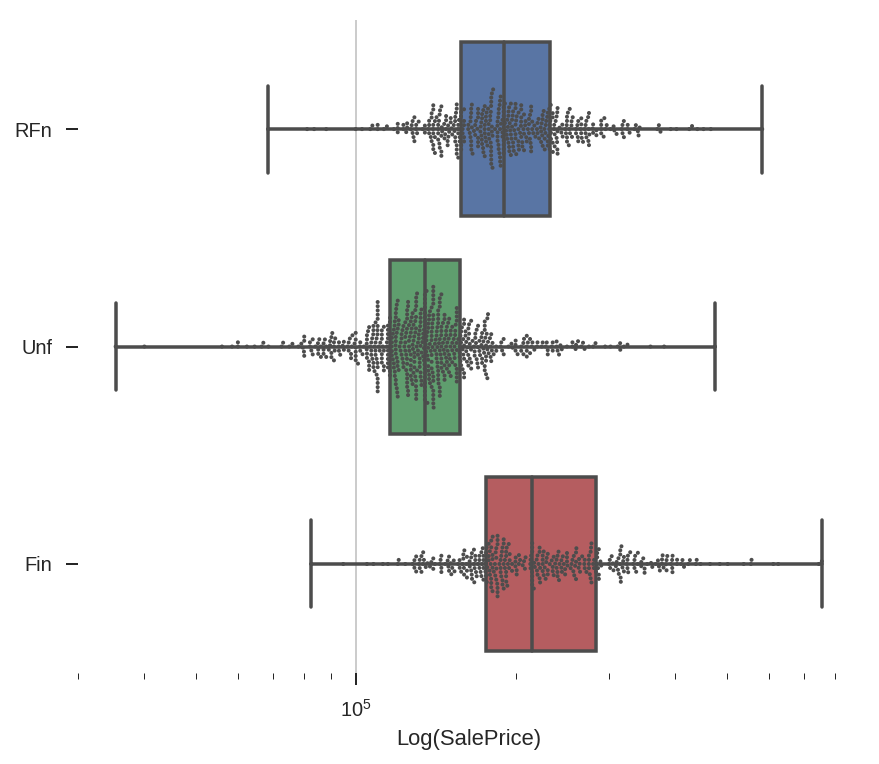

In [7]:
# Unique values in feature GarageFinish
print(set(house['GarageFinish']))
boxplotter('GarageFinish')

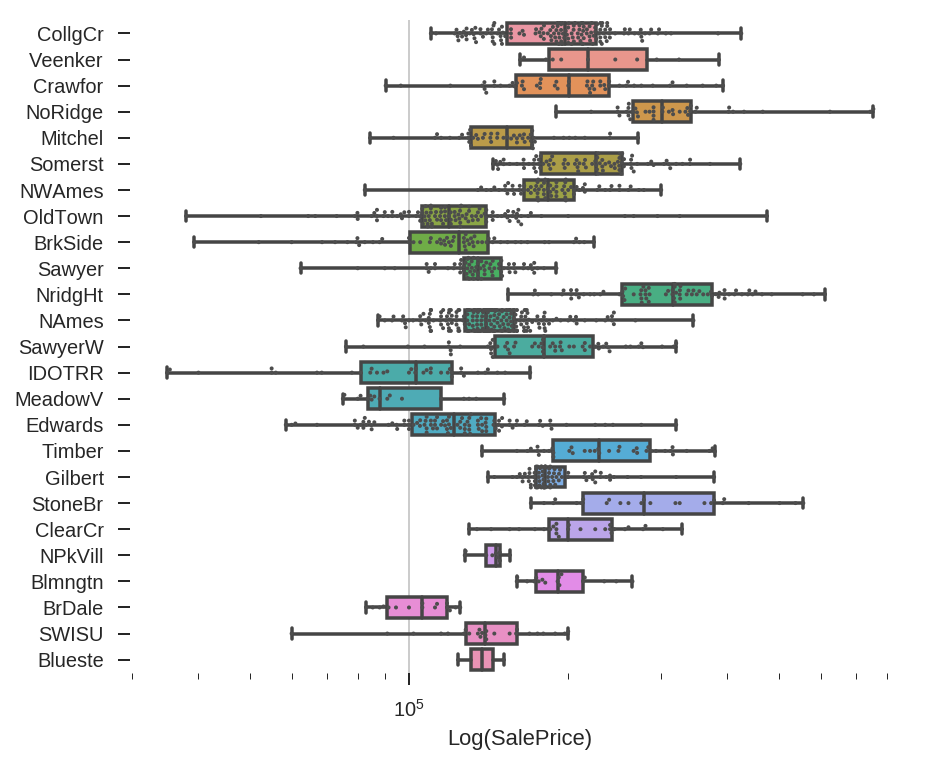

In [8]:
boxplotter('Neighborhood')

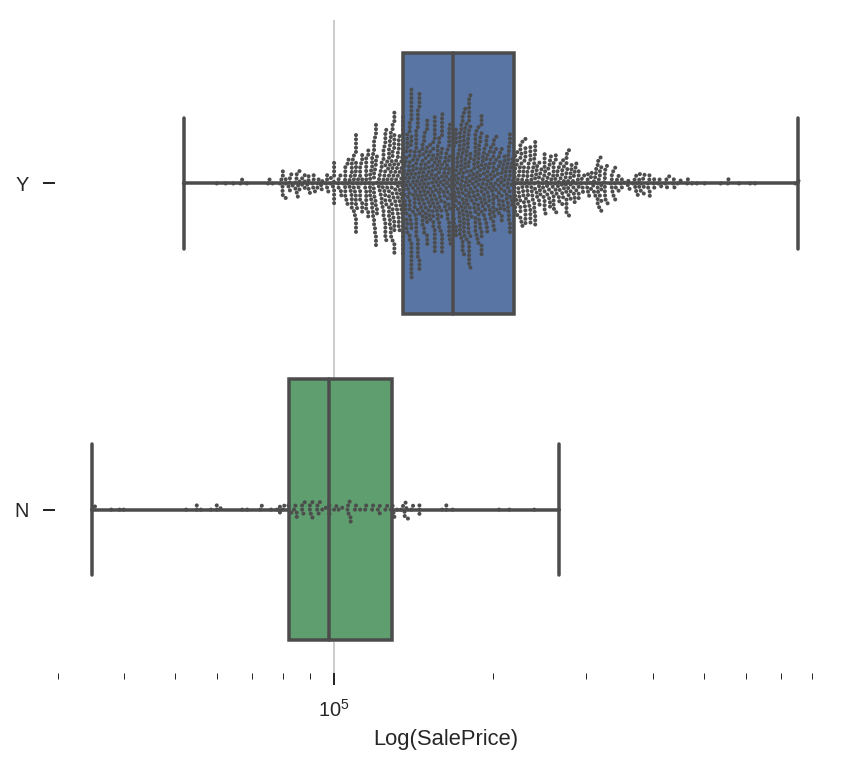

In [9]:
boxplotter('CentralAir')

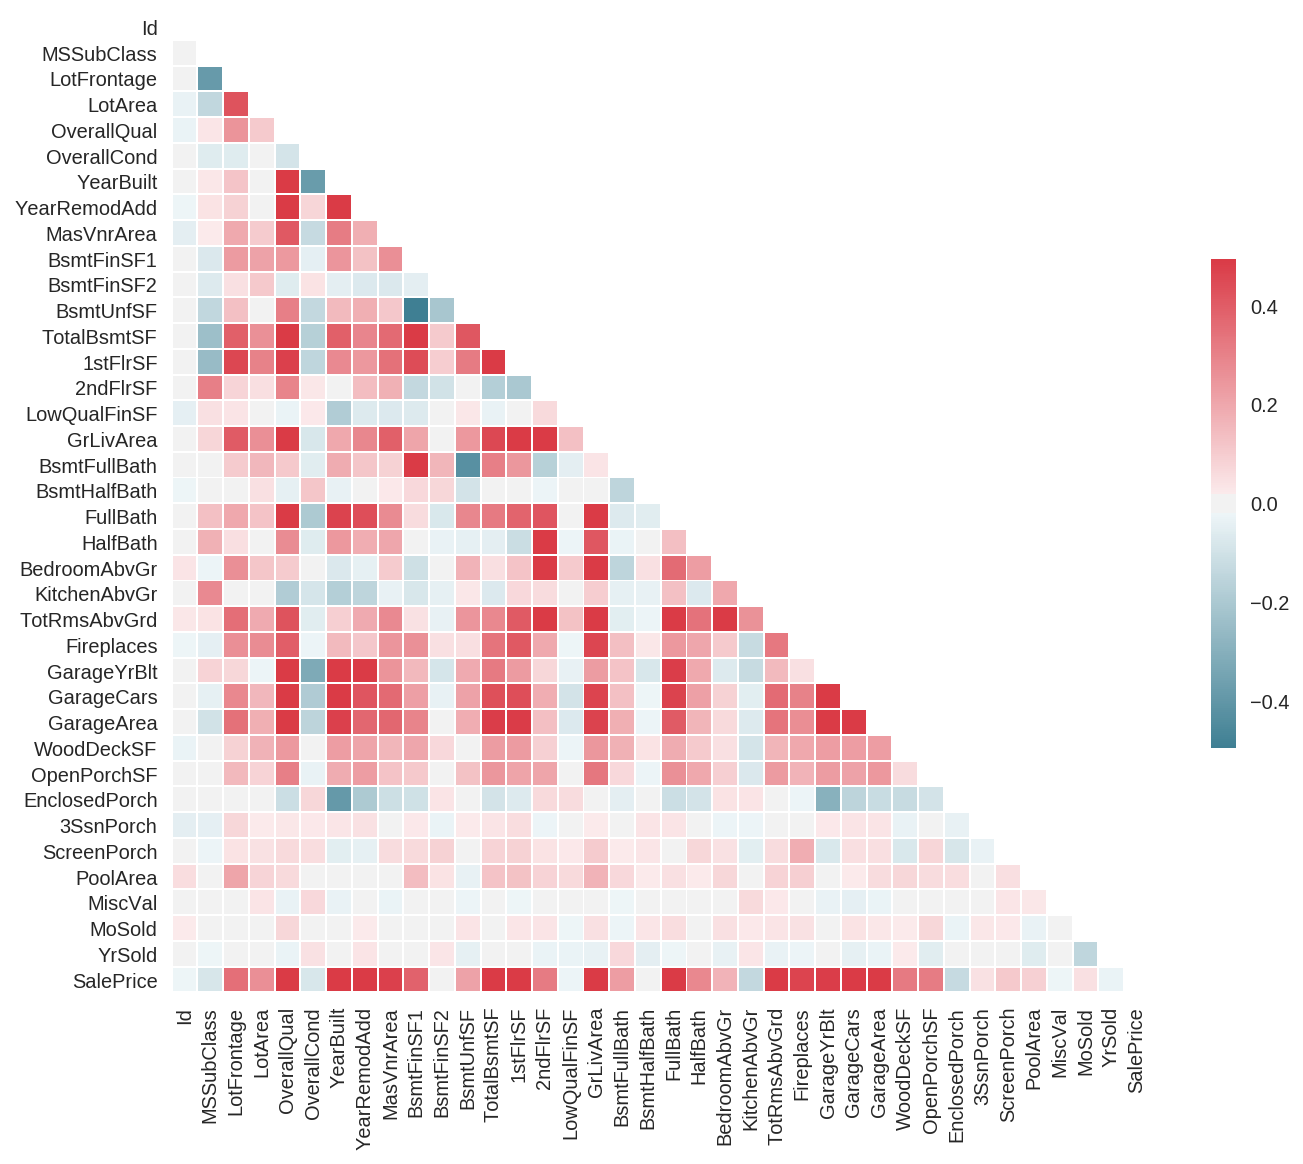

In [10]:
sns.set(style="white")

# Compute the correlation matrix
corr = house.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Note: in practice we would only want to look at features with 'numeric' type

### Visualization Summary

The plots above gives us some initial insights to the data. We first note from the histograms of the houses' SalesPrice that the data is skewed to the left. For cleaning the data we may consider de-skewing the data by taking a log-transformation to help create better predictive models. 

The boxplots of some of the features can tell us how they might indicate a house's SalesPrice. For example in the boxplot of the houses' GarageFinish feature, which tells us what the interior of a given home's garage is (Finished, Rough Finished, Unfinished, or No Garage), we can easily see that the SalePrice of a house generally increases the 'more-finished' its garage is. Similarly, we see that houses that have CentralAir typically sell for more money. 

The third boxplot displayed also yeilds some significant insights. We are able to see that the neighborhood where the house is located strongly influences its SalePrice. From a quick glance, we see that neighborhoods like Stone Brook and Northridge Heights are probably more affluent neighborhoods and therefore the SalePrice of the homes there are greater. Contrarily, we see that homes in Briardale and Meadow Village tend to be cheaper.

The final plot is a heatmap that visualizes the correlation between all the features with each other. In the plot, the red-er the color, the more positive the correlation between the two features are, while the blue-er colors displays the more negatively correlations. Absence of color means little correlation between the features exists. Some of the correlations between the features are intuitive. For example, we see a strong correlation between the houses' YearBuilt and its OverallCond. We see some other strong correlation between the features that we should keep in mind when building a predictive model. We want to avoid colinearity between our features when building a model, so for data cleaning we may want to remove features that are strongly colinear.



## Data Cleaning

Strategy -- We can see from the data that there are 38 features that are continuous variables (ex. SalePrice, PoolArea, etc) and there are 43 features that can be considered categorical (ex. PoolQC, GarageQual, etc.). This section will convert the feature values to the appropriate data type. We will also remove NaN values from our set where appropriate. We will also de-skew any feature data where appropriate.

In [11]:
house.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
979,980,20,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,139000
1018,1019,80,RL,NaN,10784,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,160000
761,762,30,RM,60.0,6911,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,100000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1178,1179,50,RL,54.0,7681,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,154900


In [12]:
# Convert categorical variables
categorical_cols = []
numeric_cols = []
for feature in house.columns:
    if house[feature].dtype == 'O':
        categorical_cols.append(feature)
        house[feature] = house[feature].astype('category')
    else:
        numeric_cols.append(feature)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null catego

From this point, we will need to process the categorical and numerical features seperately. For the numeric features, we will remove and handle the NaN values that appear in the data. The strategy we use to handle such values is to use the mode of the dataset feature, since most of the distributions of the data are heavily skewed. Following the NaN transformation, we will then de-skew any data that has a skewness over 0.75 with a log-transformation.

In [13]:
# Use sklearn's Imputer library to deal with the NaN values
from sklearn.preprocessing import Imputer
from scipy.stats import skew

# Initialize the Imputer object with the strategy to replace NaN with Mode values
imp = Imputer(strategy='most_frequent')
house_num = pd.DataFrame(imp.fit_transform(house[numeric_cols]),columns=numeric_cols)

print('')
print('-------------Skew Report-------------')
# Skew report after transformation
for feature in numeric_cols:
    if np.abs(skew(house_num[feature])) > 0.75:
        house_num[feature] = house_num[feature].apply(lambda x: np.log(x+1))
        print('')
        print('Feature: {}'.format(feature))
        print('Before Skew: {}'.format(skew(house[feature])))
        print('After Skew: {}'.format(skew(house_num[feature])))



-------------Skew Report-------------

Feature: MSSubClass
Before Skew: 1.4062101115313512
After Skew: 0.2487412176191193

Feature: LotFrontage
Before Skew: nan
After Skew: -0.6290298637450841

Feature: LotArea
Before Skew: 12.195142125084478
After Skew: -0.13726327193353463

Feature: MasVnrArea
Before Skew: nan
After Skew: 0.5030142428849528

Feature: BsmtFinSF1
Before Skew: 1.6837708962341815
After Skew: -0.6177742838938641

Feature: BsmtFinSF2
Before Skew: 4.250888017057445
After Skew: 2.521100187789297

Feature: BsmtUnfSF
Before Skew: 0.9193227015582005
After Skew: -2.18425653050519

Feature: TotalBsmtSF
Before Skew: 1.522688086978629
After Skew: -5.149372577588974

Feature: 1stFlrSF
Before Skew: 1.3753417421837937
After Skew: 0.08003175718429047

Feature: 2ndFlrSF
Before Skew: 0.8121942731961613
After Skew: 0.28934579420210166

Feature: LowQualFinSF
Before Skew: 9.002080417658552
After Skew: 7.452649617407249

Feature: GrLivArea
Before Skew: 1.365155954773434
After Skew: -0.00613

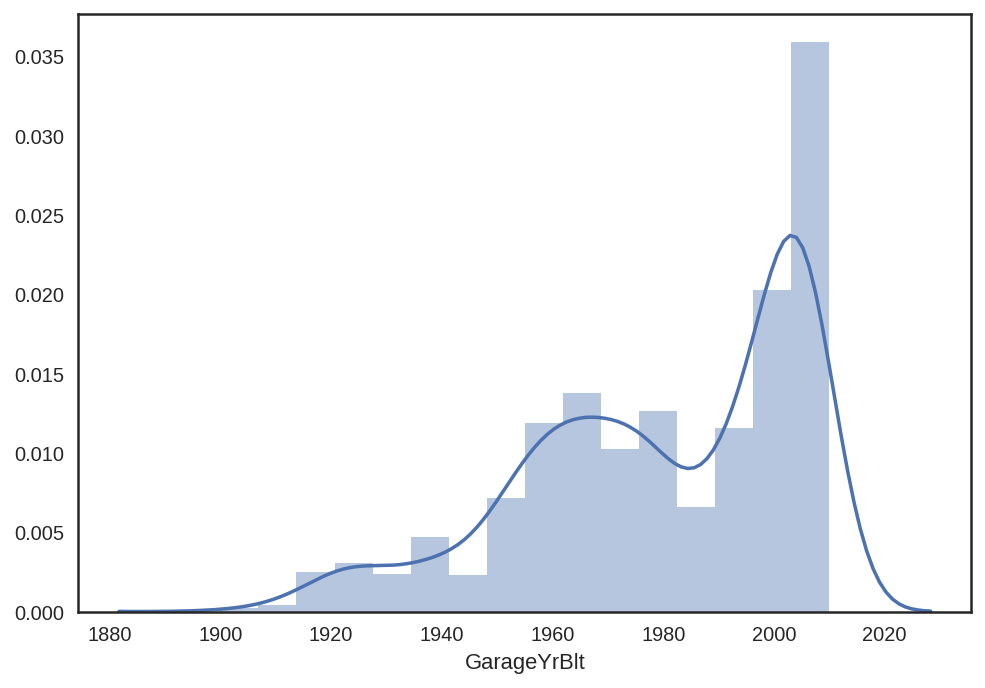

In [14]:
_ = sns.distplot(house_num['GarageYrBlt'])

For the categorical data, we will one-hot encode the values, which will expand our feature space significantly. Once this is completed, we will combine our numeric and categorical datasets into a single data frame.

In [15]:
# Extract the categorical features
house_cat = house[categorical_cols]

# encode all the categorical features
house_cat = pd.get_dummies(house_cat)

# combine the numeric and categorical features into a single DF
house_df = pd.concat([house_num, house_cat],axis=1)

print('The categorical df shape is: {}'.format(house_cat.shape))
print('The numeric df shape is: {}'.format(house_num.shape))
print('The final df shape is: {}'.format(house_df.shape))

# Drop the Id column feature since it will not contribute to the model
house_df.drop('Id',axis=1,inplace=True)

The categorical df shape is: (1460, 252)
The numeric df shape is: (1460, 38)
The final df shape is: (1460, 290)


In [16]:
import os
os.getcwd()

'/home/jovyan/Ames-Housing-Data/ipynb'

In [21]:
import os
import pickle
savepath = '../pkl/house_df.pkl'
if not os.path.exists(savepath):
    with open(savepath,'wb') as f:
        pickle.dump(house_df,f)
else:
    print('File already exists!')

File already exists!


In [ ]:
mask = (house['MSZoning'] == 'RH') | (house['MSZoning'] == 'RL') \
| (house['MSZoning'] == 'RP') | (house['MSZoning'] == 'RM')\
| (house['MSZoning'] == 'FV')

In [ ]:
house = house[mask]

In [ ]:
house.reset_index(inplace=True,drop=True)

In [ ]:
house.shape

In [ ]:
house.drop(labels=['Id'],inplace=True,axis=1)

In [ ]:
house.head()

Three of the features that are continuous variables contain NaN values that must be edited. This section looks at the distribution of values amongst these features to see if replacing them with some descriptive statistic (i.e. the mean, mode) will make some sense.

In [ ]:
# house.isnull().sum()
plt.figure(figsize=(4,4))
house['LotFrontage'].hist()
plt.figure(figsize=(4,4))
house['MasVnrArea'].hist()
plt.figure(figsize=(4,4))
house['GarageYrBlt'].hist()

The distribution of data is skewed for the features in question -- It therefore makes sense to replace the NaN values in these cases with the Mode of the data set.

In [ ]:
house['LotFrontage'].fillna(house['LotFrontage'].mode()[0],inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].mode()[0],inplace=True)
house['GarageYrBlt'].fillna(house['GarageYrBlt'].mode()[0], inplace=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

Features that are classified FIXED (Not-Renovate-able):
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
YearBuilt
YearRemodAdd
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
Bedroom
Kitchen
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscFeature 
MiscVal
YrSold
SaleType
SaleCondition








### Question 1 -- Perform cleaning, feature engineering, and EDA

In [ ]:
# Load the data
house = pd.read_csv('./housing.csv')

In [ ]:
# A:
house.head()

In [ ]:
house.info()

### Question 2 -- Filter out the non-residential homes

Mask to filter out residential homes from the data

In [ ]:
mask = (house['MSZoning'] == 'RH') | (house['MSZoning'] == 'RL') \
| (house['MSZoning'] == 'RP') | (house['MSZoning'] == 'RM')\
| (house['MSZoning'] == 'FV')

In [ ]:
house = house[mask]

In [ ]:
house.reset_index(inplace=True,drop=True)

In [ ]:
house.shape

In [ ]:
house.drop(labels=['Id'],inplace=True,axis=1)

In [ ]:
house.head()

Three of the features that are continuous variables contain NaN values that must be edited. This section looks at the distribution of values amongst these features to see if replacing them with some descriptive statistic (i.e. the mean, mode) will make some sense.

In [ ]:
# house.isnull().sum()
plt.figure(figsize=(4,4))
house['LotFrontage'].hist()
plt.figure(figsize=(4,4))
house['MasVnrArea'].hist()
plt.figure(figsize=(4,4))
house['GarageYrBlt'].hist()

The distribution of data is skewed for the features in question -- It therefore makes sense to replace the NaN values in these cases with the Mode of the data set.

In [ ]:
house['LotFrontage'].fillna(house['LotFrontage'].mode()[0],inplace=True)
house['MasVnrArea'].fillna(house['MasVnrArea'].mode()[0],inplace=True)
house['GarageYrBlt'].fillna(house['GarageYrBlt'].mode()[0], inplace=True)

### Question 3 - Identify 'fixed' features that can predict house price

In [ ]:
fixed_features = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape',
                  'LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                  'Condition2','BldgType','HouseStyle','YearBuilt','MasVnrArea','Foundation',
                  'BsmtCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                  'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt',
                  'GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscFeature','MiscVal','MoSold','YrSold',
                  'SaleType','SaleCondition']

In [ ]:
# Extract the renovatable features
renovatable_features = []
for cols in house.columns:
    if cols not in fixed_features:
        renovatable_features.append(cols)
    # Ensure YrSold added to renovatables
    if cols == 'YrSold':
        renovatable_features.append(cols)


In [ ]:
house_fixed = pd.DataFrame(house[fixed_features])
house_fixed['SalePrice'] = house['SalePrice']

In [ ]:
# Adds Variables that should change type to categorical
categorical_cols = []
numeric_cols = []
for feature in house_fixed.columns:
    if house_fixed[feature].dtype == 'O':
        categorical_cols.append(feature)
        house_fixed[feature] = house_fixed[feature].astype('category')
    elif feature == 'MSSubClass':
        categorical_cols.append(feature)
        house_fixed[feature] = house_fixed[feature].astype('category')
    else:
        numeric_cols.append(feature)

Get dummies on categorical columns

In [ ]:
house_fixed = pd.get_dummies(data=house_fixed,columns=categorical_cols, dummy_na=True)


### Question 4 -- Train a model on pre-2010 data and evaluate its performance on the 2010 houses

### PCA 
A principal component analysis was conducted on the data as a form of feature engineering. The goal of this section was to calculate the first few components of the data, and then include them as additional features before fitting the model. This was inspired by the medium article that was shared by the instructors. An important note to using PCA is that YOU MUST FIRST SCALE THE DATA. Initially I performed PCA on unscaled data and resulted in having only one significant principal component. Having only one component explain the majority of the variance is a good indicator that data may not be scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()

In [ ]:
X_sc = scaler.fit_transform(house_fixed[numeric_cols].drop('SalePrice',axis=1))

In [ ]:
X_sc

In [ ]:
pca = PCA(n_components=4)
pca.fit(X_sc)

In [ ]:
pc_df = pd.DataFrame(pca.transform(house_fixed[numeric_cols].drop('SalePrice',axis=1)),
             columns=['PC_{}'.format(num) for num in range(1,5)])

In [ ]:
pca.explained_variance_ratio_

Append the Principal components to the original scaled DataFrame

In [ ]:
pc_df.shape

In [ ]:
house_fixed.shape

In [ ]:
house_fixed_final = pd.concat([house_fixed, pc_df],axis=1)

In [ ]:
house_fixed_final.shape

Evaluate only if skipping PCA

In [ ]:
#house_fixed_final = house_fixed

### Split into train and test based on the Year Sold

In [ ]:
year_2010_mask = house_fixed['YrSold'] == 2010

house_fixed_train = house_fixed_final[~year_2010_mask]
house_fixed_test = house_fixed_final[year_2010_mask]

In [ ]:
house_fixed_train.shape

In [ ]:
house_fixed_test.shape

In [ ]:
X_train = house_fixed_train.drop('SalePrice',axis=1)
yy_train = house_fixed_train['SalePrice']

X_test = house_fixed_test.drop('SalePrice',axis=1)
yy_test = house_fixed_test['SalePrice']

In [ ]:
print('Features TRAINING set shape: {}'.format(X_train.shape))
print('Target TRAINING set shape: {}'.format(yy_train.shape))
print('Features TEST set shape: {}'.format(X_test.shape))
print('Target TEST set shape: {}'.format(yy_test.shape))

### Create and test a couple models -- use Lasso, Elastic, RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LassoCV, SGDRegressor
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, classification_report, auc, make_scorer, precision_recall_curve

### Final Model --- RFE
This model was selected going forward for Problem 2. The final pipeline is outlined in the diagram below. The data is scaled with StandardScaler and the number of features selected for the model was trimmed to the most important 150 features using the Recursive Feature Elimination transformer. Finally, the data is fit using a Random Forest Regressor.

Optional: load model from pickle

In [ ]:
gs_rfe_pipe = joblib.load('fixed_random_forrest_regressor.pkl') 

In [ ]:
# rfe_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('feature_selection', RFE(estimator=RandomForestRegressor()) ),
#     ('regressor', RandomForestRegressor())
# ])

# rfe_params = {
#     'feature_selection__estimator': [RandomForestRegressor()],
#     'feature_selection__n_features_to_select': [150],
#     'regressor__n_estimators': [300],
#     'regressor__max_features':['log2'],
#     'regressor__max_depth':[35]
# }

# gs_rfe_pipe = GridSearchCV(rfe_pipe,
#                            param_grid=rfe_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=1)

# gs_rfe_pipe.fit(X_train, yy_train)

In [ ]:
print(gs_rfe_pipe.best_params_)
print(gs_rfe_pipe.score(X_train, yy_train))
print(gs_rfe_pipe.score(X_test,yy_test))

The model is serialized below as a Python pickle.

In [ ]:
#joblib.dump(gs_rfe_pipe, 'fixed_random_forrest_regressor.pkl') 

Many models were explored to see what would be the best predictor of sales price given a home's fixed features. The following blocks of code explored different regression models and feature selection transformers, however, these were not ultimately selected, but are here as a reference. 

## For Reference ONLY
________________________________________________________________________________________________

## Model 1A -- SGD Regression

In [ ]:
# dtsgd_pipe = Pipeline([
#     ('skb', SelectKBest(score_func=f_regression)),
#     ('scaler', StandardScaler()),
#     ('sfm', SelectFromModel( estimator=ElasticNet() ) ),
#     ('clf', SGDRegressor())
# ])

# dtsgd_params = {
# #     'skb__k':[60,70],
#     'skb__k': [72, 75, 77],
#     'sfm__estimator':[ElasticNet(alpha=a, l1_ratio=l) for a in np.logspace(-4,-3,5) for l in np.linspace(.1,.9,10)],
# #     'sfm__estimator':[Lasso(alpha=a) for a in np.logspace(-6,-5,5)]
# #     'clf__max_depth': [71, 72, 73],
# #     'clf__max_depth':[35,40,45]
#     'clf__penalty': ['l1', 'l2']
    
# }

# gs_dtsgd_pipe = GridSearchCV(dtsgd_pipe,
#                            param_grid=dtsgd_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=0)

# gs_dtsgd_pipe.fit(X_train, yy_train)

# gs_dtsgd_pipe.best_params_

# gs_dtsgd_pipe.score(X_train, yy_train)

# gs_dtsgd_pipe.score(X_test,yy_test)

## Model 2 -- RandomForest Regression

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor
# from sklearn.pipeline import Pipeline

# dtr_pipe = Pipeline([
#     ('skb', SelectKBest(score_func=f_regression)),
#     ('scaler', StandardScaler()),
#     ('sfm', SelectFromModel(estimator=ElasticNet())),
#     ('clf', RandomForestRegressor(n_jobs=-1))
# ])

# dtr_params = {
# #     'skb__k':[60,70],
#     'skb__k': [72, 75, 77],
# #     'sfm__estimator':[ElasticNet(alpha=a, l1_ratio=l) for a in np.logspace(-4,-3,5) for l in np.linspace(.1,.9,10)],
#     'sfm__estimator':[Lasso(alpha=a) for a in np.logspace(-6,-5,5)],
#     'clf__max_depth': [71, 72, 73],
# #     'clf__max_depth':[35,40,45]
    
# }

# gs_dtr_pipe = GridSearchCV(dtr_pipe,
#                            param_grid=dtr_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=0)

# gs_dtr_pipe.fit(X_train, yy_train)

# gs_dtr_pipe.best_params_

# gs_dtr_pipe.score(X_train, yy_train)

# gs_dtr_pipe.score(X_test,yy_test)

## Model 3 -------- Linear Regression con L1 Regularization

In [ ]:
# dtl_pipe = Pipeline([
#     ('skb', SelectKBest(score_func=f_regression)),
#     ('scaler', StandardScaler()),
#     ('sfm', SelectFromModel(estimator=Lasso())),
#     ('lr', Lasso())
# ])
# dtl_params = {
#     'skb__k':[50, 51, 52],
#     'sfm__estimator':[Lasso(), ElasticNet()],
#     'lr__alpha': np.logspace(-4,2,9)
    
# }

# gs_dtl_pipe = GridSearchCV(dtl_pipe,
#                            param_grid=dtl_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=1)

# gs_dtl_pipe.fit(X_train, yy_train)

# gs_dtl_pipe.score(X_train,yy_train)

# gs_dtl_pipe.score(X_test,yy_test)

## Reference End
________________________________________________________________________________________________

### 5) Characterize your model. How well does it perform? What are the best estimates of price?

Based on the scores from the training and test sets above, I'm confident that the model is accurately predicting home sales price. The trained model ended up with an accuracy close to 98%, while the test score was closer to 87%. It can be argued that the model is slightly overfitting the data because of it's near-perfect training score, but I'm not too concerned at the moment considering that the test score for predicting 2010 home sale prices was still relatively good. 

The following steps will show the most important features that were determined from the model.

Verify that the sum of the feature importances add to 1, indicating that each feature importance represents a percentage of the total sum.


In [ ]:
sum(gs_rfe_pipe.best_estimator_.named_steps['regressor'].feature_importances_)

Grab the 150 features that were selected from the Recursive Feature Elimination Step

In [ ]:
feat_mask = pd.Series(gs_rfe_pipe.best_estimator_.named_steps['feature_selection'].support_)
feat=X_train.columns[feat_mask]

Plot the top 20 features

In [ ]:
xgb_feat_imps = gs_rfe_pipe.best_estimator_.named_steps['regressor'].feature_importances_
# col_names = ["col_{}".format(i) for i in range(1,20)]
col_names = X_train.columns[feat_mask]
feats_df = pd.DataFrame(list(zip(col_names, xgb_feat_imps)), columns= ['col_name','importance'])

In [ ]:
top_20_feats = feats_df.sort_values('importance',ascending=False)[:20]

In [ ]:
fig, ax = plt.subplots()
ax.barh(range(top_20_feats.shape[0]), top_20_feats['importance'], align='center')
ax.set_yticks(np.arange(top_20_feats.shape[0]))
ax.set_yticklabels(top_20_feats['col_name'])
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Top 20 Features')
plt.show()

The plot above shows the top 20 features most important to predicting the sales price of a home. By observing the first few indicators we can see there is a trend for the type of features that are important in prediction. Features like above ground living area ('GrLivArea'), garage area, total basement area, and first floor area are all metrics that evaluate the home space in square-feet. This is something that intuitively makes sense -- the larger a home is, the more valuable it is likely to be. More surprisingly, we can see that the principal components that were feature engineered appear in the top twenty. PC1 comes in second, while PC3 and PC2 also make the list. Although we can only guess what quality is really being measured by these features, it is validating to see that the principal components calculated were capturing the data's highest explained variance and therefore are likely candidates for the creation of predictors. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

### Question 1: Evaluate the effect in dollars of the renovate-able features
For this question, I create a model using the renovate-able features that were defined earlier in this notebook to predict the residuals calculated from the model in Problem 1

In [ ]:
# A:
residuals_train = yy_train - gs_rfe_pipe.predict(X_train)
residuals_test = yy_test - gs_rfe_pipe.predict(X_test)

In [ ]:
residuals_test.shape

In [ ]:
residuals_train.shape

In [ ]:
house_renovatable = pd.DataFrame(house[renovatable_features])
house_renovatable['SalePrice'] = house['SalePrice']

In [ ]:
house_renovatable.shape

In [ ]:
house_renovatable.info()

In [ ]:
# Adds Variables that should change type to categorical
categorical_cols = []
numeric_cols = []
for feature in house_renovatable.columns:
    if house_renovatable[feature].dtype == 'O':
        categorical_cols.append(feature)
        house_renovatable[feature] = house_renovatable[feature].astype('category')
    else:
        numeric_cols.append(feature)


In [ ]:
house_renovatable.info()

In [ ]:
house_renovatable = pd.get_dummies(data=house_renovatable, columns=categorical_cols, dummy_na=True)

In [ ]:
house_renovatable.info()

In [ ]:
year_2010_mask = house_renovatable['YrSold'] == 2010

house_renovatable_train = house_renovatable[~year_2010_mask]
house_renovatable_test = house_renovatable[year_2010_mask]

In [ ]:
X_train = house_renovatable_train.drop('SalePrice',axis=1)
X_test = house_renovatable_test.drop('SalePrice',axis=1)

In [ ]:
print('Features TRAINING set shape: {}'.format(X_train.shape))
print('Target TRAINING set shape: {}'.format(residuals_train.shape))
print('Features TEST set shape: {}'.format(X_test.shape))
print('Target TEST set shape: {}'.format(residuals_test.shape))

Create Model Using Same Pipeline from Problem 1

In [ ]:
gs_renovate_pipe = joblib.load('renovate_random_forrest_regressor.pkl') 

In [ ]:
# renovate_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('feature_selection', RFE(estimator=RandomForestRegressor()) ),
#     ('regressor', RandomForestRegressor())
# ])

# renovate_params = {
#     'feature_selection__estimator': [RandomForestRegressor()],
#     'feature_selection__n_features_to_select': [150],
#     'regressor__n_estimators': [300],
#     'regressor__max_features':['log2','auto'],
#     'regressor__max_depth':[60]
# }

# gs_renovate_pipe = GridSearchCV(renovate_pipe,
#                            param_grid=renovate_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=1)

# gs_renovate_pipe.fit(X_train, yy_train)

In [ ]:
print(gs_renovate_pipe.best_params_)
print(gs_renovate_pipe.score(X_train, yy_train))
print(gs_renovate_pipe.score(X_test, yy_test))

The model is serialized below as a Python pickle.

In [ ]:
# joblib.dump(gs_renovate_pipe, 'renovate_random_forrest_regressor.pkl') 

## For Reference ONLY

_______________

In [ ]:
# renovate_pipe = Pipeline([
#     ('skb', SelectKBest(score_func=f_regression)),
#     ('scaler', StandardScaler()),
#     ('sfm', SelectFromModel( estimator=ElasticNet() ) ),
#     ('clf', SGDRegressor())
# ])

# renovate_params = {
# #     'skb__k':[60,70],
#     'skb__k': [72, 75, 77],
#     'sfm__estimator':[ElasticNet(alpha=a, l1_ratio=l) for a in np.logspace(-4,-3,5) for l in np.linspace(.1,.9,10)],
# #     'sfm__estimator':[Lasso(alpha=a) for a in np.logspace(-6,-5,5)]
# #     'clf__max_depth': [71, 72, 73],
# #     'clf__max_depth':[35,40,45]
#     'clf__penalty': ['l1', 'l2']
    
# }

# gs_renovate_pipe = GridSearchCV(renovate_pipe,
#                            param_grid=renovate_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=0)

# gs_renovate_pipe.fit(X_train, yy_train)

# gs_renovate_pipe.best_params_

# print(gs_renovate_pipe.score(X_train, yy_train))
# print(gs_renovate_pipe.score(X_test, yy_test))

In [ ]:
# dtsgd_pipe = Pipeline([
#     ('skb', SelectKBest(score_func=f_regression)),
#     ('scaler', StandardScaler()),
#     ('sfm', SelectFromModel( estimator=ElasticNet() ) ),
#     ('clf', SGDRegressor())
# ])

# dtsgd_params = {
# #     'skb__k':[60,70],
#     'skb__k': [72, 75, 77],
#     'sfm__estimator':[ElasticNet(alpha=a, l1_ratio=l) for a in np.logspace(-4,-3,5) for l in np.linspace(.1,.9,10)],
# #     'sfm__estimator':[Lasso(alpha=a) for a in np.logspace(-6,-5,5)]
# #     'clf__max_depth': [71, 72, 73],
# #     'clf__max_depth':[35,40,45]
#     'clf__penalty': ['l1', 'l2']
    
# }

# gs_dtsgd_pipe = GridSearchCV(dtsgd_pipe,
#                            param_grid=dtsgd_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=0)

# gs_dtsgd_pipe.fit(X_train, yy_train)
# gs_dtsgd_pipe.best_params_


# print(gs_dtsgd_pipe.score(X_train, yy_train))
# print(gs_dtsgd_pipe.score(X_test,yy_test))


_____

### Question 2: How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have build to determine if they can make money

The first model that was created predicts the sales price of a home based on the features that were deemed 'fixed'. In the second model, the sales price is predicted from the 'renovatable' parts of the home. The combination of these two models can be used by the company to determine if buying a property would turn over profit. By using the first model, the company can estimate the value of a home, let's say for example \$100,000. This would be the price that the company would pay to buy a home. The second model can then be used to estimate the sales price of that same home after a series of renovations take place. For example, let's say that the company invests in some renovations in the home thereby raising the quality of the bathrooms and the garage conditions. The raised conditions predict the sales price of the home to be \$120,000. Therefore, the company could sell the home at \$120,000. The company would then make money if the cost of the renovations did not exceed the \$20,000 increased value of the home.

### Question 3: Investigate how much of the variance in price remaining is explained by these features.

The variance in the price remaining from the first model were calculated as the residuals in an earlier step of this notebook and are plotted below.

In [ ]:
plt.plot(residuals_train)
plt.title('Training Set Residuals')
plt.figure()
plt.plot(residuals_test)
plt.title('Test Set Residuals')

In [ ]:
print(np.std(residuals_train))
print(np.std(residuals_test))

The residuals between the model from Part 1 and the data are quite substantial in some of the cases. While most of the residuals fall within \$5000 of the actual test data, some exceed as high as $200000.

### Question 4: Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

Not sure if I trust my model yet. I would like to have more time to find a better fitting model -- the test data scored 78% accuracy. I would be more comfortable to have a more accurate model in order to justify the difference in residuals from my first model. With more time, I probably could try some additional feature engineering to overcome this gap and to confidently describe the variance in the data.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

### Question 1: Determine which features predict the 'Abnorml' category in the 'SaleCondition' feature

For answering this question, a new model was built. Instead of using just renovatable or fixed features, all features were included in the model. A gradient boosting model was fit to the data and the top twenty important features were identified. The following section outlines the data prepping of the original housing data in the DataFrame 'house'

In [ ]:
house.columns

In [ ]:
# Adds Variables that should change type to categorical
categorical_cols = []
numeric_cols = []
for feature in house.columns:
    if house[feature].dtype == 'O':
        categorical_cols.append(feature)
        house[feature] = house[feature].astype('category')
    else:
        numeric_cols.append(feature)
categorical_cols.remove('SaleCondition')

In [ ]:
X_ = house.drop('SaleCondition',axis=1)
yy_= house['SaleCondition']

In [ ]:
X_ = pd.get_dummies(X_, columns=categorical_cols, dummy_na=True)

In [ ]:
type(X_)

In [ ]:
type(yy_)

The following encodes the target feature 'SaleCondition' such that the abnormal sales are assigned to the value 1, and all others are assinged to the value of 0

In [ ]:
yy_ = yy_.apply(lambda x: 1 if x == 'Abnorml' else 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_,yy_,random_state=0) 

In [ ]:
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

In [ ]:
type(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Create boosted model to predict the home SaleCondition

In [ ]:
import xgboost as xgb

Load pre-trained model from pickle

In [ ]:
gs_clf_pipe = joblib.load('SaleCondition_clf.pkl') 

In [ ]:
# clf_pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf', xgb.XGBClassifier())
# ])

# clf_params ={
#     'clf__max_depth':[1,3,5],
#     'clf__learning_rate':[.1,.5],
#     'clf__n_estimators':[100,250]
# }

# gs_clf_pipe = GridSearchCV(clf_pipe,
#                            param_grid=clf_params,
#                            cv=ShuffleSplit(n_splits=5, random_state=42),
#                            n_jobs = -1,
#                            verbose=1)
# gs_clf_pipe.fit(X=X_train, y=y_train)

In [ ]:
print(gs_clf_pipe.best_params_)
print(gs_clf_pipe.score(X_train,y_train))
print(gs_clf_pipe.score(X_test,y_test))

Saved model

In [ ]:
# joblib.dump(gs_clf_pipe, 'SaleCondition_clf.pkl') 

The following code is used to rank the feature importance and to display the top twenty features that contributed to predicting the abnormal sale condition.

In [ ]:
xgb_feat_imps = gs_clf_pipe.best_estimator_.named_steps['clf'].feature_importances_
# col_names = ["col_{}".format(i) for i in range(1,20)]
col_names = X_.columns
feats_df = pd.DataFrame(list(zip(col_names, xgb_feat_imps)), columns= ['col_name','importance'])

In [ ]:
top_20_feats = feats_df.sort_values('importance',ascending=False)[:20]

In [ ]:
top_20_feats

In [ ]:
fig, ax = plt.subplots()
ax.barh(range(top_20_feats.shape[0]), top_20_feats['importance'], align='center')
ax.set_yticks(np.arange(top_20_feats.shape[0]))
ax.set_yticklabels(top_20_feats['col_name'])
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Top 20 Features')
plt.show()

In [ ]:
gs_clf_pipe.best_estimator_.named_steps['clf']

### Question 2: Justify your results

This was actually more simple than I thought it would be. Using a gradient-boosted model on the entire dataset, I was able to train a model that achieved 94.5% model accuracy with the training data, and 91% accuracy with the test set. IN this particular approach, no special feature engineering was done. The data was prepared such that the model only predicts if the sale was abnormal or not -- it does not give any insights to a sale condition other than abnormal. From the plot of the top 20 features above, we see that sales price was a strong indicator on the abnormality of the sale. This makes a lot of sense -- since abnormal sales probably correlated strongly with lower sales prices.

_______________________

Note to instructor: There was a lot more work that I would like to have done to this notebook, but I simply ran out of time. For future work, I would plot more EDA to explore some of the features in greater detail and to give some insights into more clever ways to feature engineering. It would have been instresting to see if ONLY the PCA components were used in the model generation, if that would have yeilded higher scores. I was also inclined to explore the use of polynomial features to see if that had the same desired effect as including the PCA components that I did earlier. In general, I spent too much time on trying out different types of machine learning models that didn't yeild satisfactory scores. Will probably build on the future work I've outlined here for preparing my portfolio.